<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_2_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,78.438322,99.266218,0.000385,187.704925,187.703958,0.000967
1,0.0,1.0,62.881943,76.163066,-0.009877,149.035132,149.045654,-0.010523
2,0.0,2.0,37.005254,42.762451,-0.017672,89.750033,89.769861,-0.019828
3,0.0,3.0,40.734855,97.093206,0.001419,147.829479,147.824766,0.004713
4,0.0,4.0,94.418715,95.989829,-0.005185,200.403359,200.409555,-0.006196
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,54.823134,29.384592,-0.009973,94.197753,94.212359,-0.014605
19996,999.0,16.0,38.426324,87.106766,-0.003317,135.529773,135.532159,-0.002386
19997,999.0,17.0,54.531743,93.890668,-0.000561,158.421850,158.419466,0.002384
19998,999.0,18.0,79.802793,65.434285,-0.012497,155.224581,155.235581,-0.011000


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    78.438322  99.266218  0.000385  187.704925  187.703958  0.000967
      1.0    62.881943  76.163066 -0.009877  149.035132  149.045654 -0.010523
      2.0    37.005254  42.762451 -0.017672   89.750033   89.769861 -0.019828
      3.0    40.734855  97.093206  0.001419  147.829479  147.824766  0.004713
      4.0    94.418715  95.989829 -0.005185  200.403359  200.409555 -0.006196
...                ...        ...       ...         ...         ...       ...
999.0 15.0   54.823134  29.384592 -0.009973   94.197753   94.212359 -0.014605
      16.0   38.426324  87.106766 -0.003317  135.529773  135.532159 -0.002386
      17.0   54.531743  93.890668 -0.000561  158.421850  158.419466  0.002384
      18.0   79.802793  65.434285 -0.012497  155.224581  155.235581 -0.011000
      19.0   89.117016  52.844325  0.012218  151.973559  151.960625  0.012934

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    78.438322  99.266218  0.000385  187.704925  187.703958  0.000967
      1.0    62.881943  76.163066 -0.009877  149.035132  149.045654 -0.010523
      2.0    37.005254  42.762451 -0.017672   89.750033   89.769861 -0.019828
      3.0    40.734855  97.093206  0.001419  147.829479  147.824766  0.004713
      4.0    94.418715  95.989829 -0.005185  200.403359  200.409555 -0.006196
...                ...        ...       ...         ...         ...       ...
999.0 15.0   54.823134  29.384592 -0.009973   94.197753   94.212359 -0.014605
      16.0   38.426324  87.106766 -0.003317  135.529773  135.532159 -0.002386
      17.0   54.531743  93.890668 -0.000561  158.421850  158.419466  0.002384
      18.0   79.802793  65.434285 -0.012497  155.224581  155.235581 -0.011000
      19.0   89.117016  52.844325  0.012218  151.973559  151.960625  0.012934

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,78.438322,99.266218,0.000385,187.704925,187.703958,0.000967
1,0.0,1.0,62.881943,76.163066,-0.009877,149.035132,149.045654,-0.010523
2,0.0,2.0,37.005254,42.762451,-0.017672,89.750033,89.769861,-0.019828
3,0.0,3.0,40.734855,97.093206,0.001419,147.829479,147.824766,0.004713
4,0.0,4.0,94.418715,95.989829,-0.005185,200.403359,200.409555,-0.006196
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,54.823134,29.384592,-0.009973,94.197753,94.212359,-0.014605
19996,999.0,16.0,38.426324,87.106766,-0.003317,135.529773,135.532159,-0.002386
19997,999.0,17.0,54.531743,93.890668,-0.000561,158.421850,158.419466,0.002384
19998,999.0,18.0,79.802793,65.434285,-0.012497,155.224581,155.235581,-0.011000


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    78.438322  99.266218  0.000385  187.704925  187.703958  0.000967
      1.0    62.881943  76.163066 -0.009877  149.035132  149.045654 -0.010523
      2.0    37.005254  42.762451 -0.017672   89.750033   89.769861 -0.019828
      3.0    40.734855  97.093206  0.001419  147.829479  147.824766  0.004713
      4.0    94.418715  95.989829 -0.005185  200.403359  200.409555 -0.006196
...                ...        ...       ...         ...         ...       ...
999.0 15.0   54.823134  29.384592 -0.009973   94.197753   94.212359 -0.014605
      16.0   38.426324  87.106766 -0.003317  135.529773  135.532159 -0.002386
      17.0   54.531743  93.890668 -0.000561  158.421850  158.419466  0.002384
      18.0   79.802793  65.434285 -0.012497  155.224581  155.235581 -0.011000
      19.0   89.117016  52.844325  0.012218  151.973559  151.960625  0.012934

[20000 rows x 6 columns]

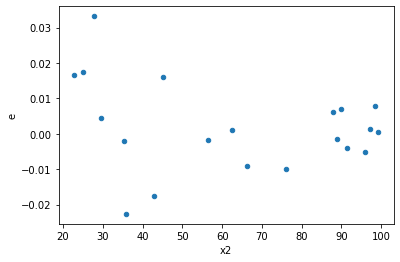

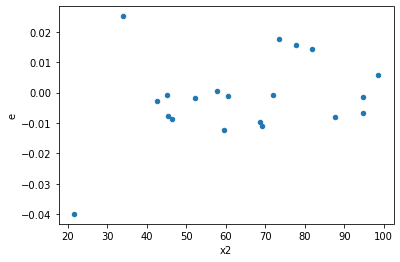

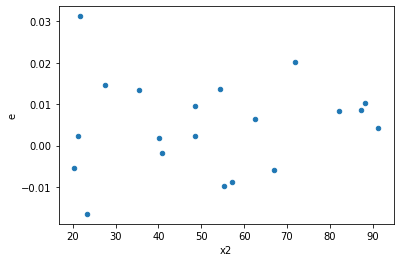

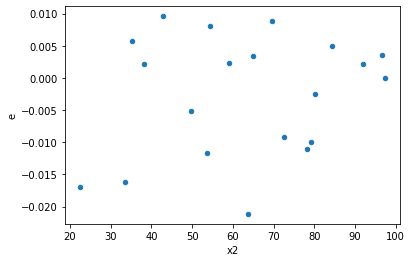

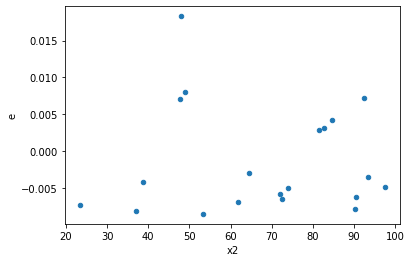

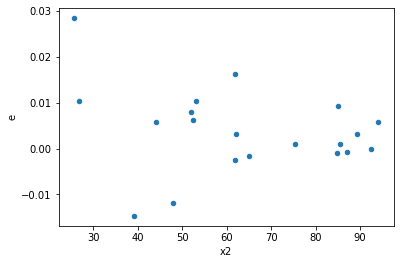

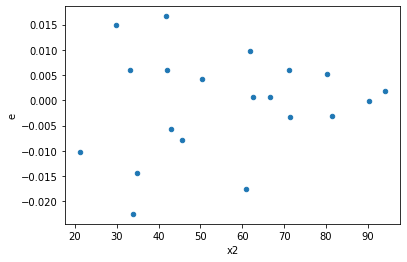

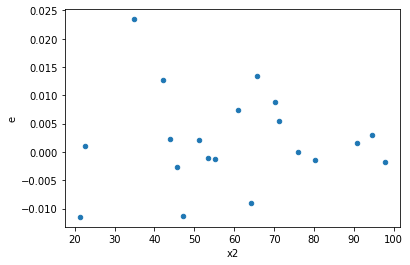

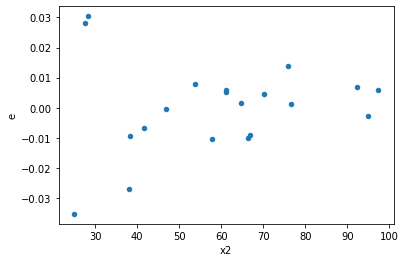

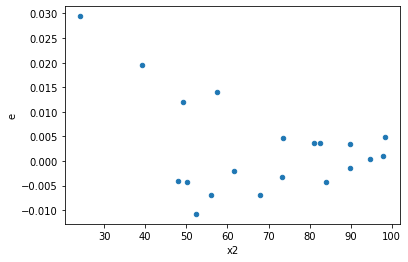

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,12.0,4.0,0.0005091300169721929,0.0008185843542599831,4.2427501414349405e-05,0.00020464608856499578,4.823430127699729,0.14115947110187732,0.9294202644490613,0.07057973555093866,Reject001=1 : Homoscedasticity
1.0,4.0,12.0,0.0004604267289140305,0.0019745793309512327,0.00011510668222850762,0.0001645482775792694,1.4295284547652174,0.5667899602790207,0.7166050198604896,0.28339498013951037,Reject001=1 : Homoscedasticity
5.0,13.0,3.0,0.0006314168749233864,0.00025595138395219315,4.8570528840260494e-05,8.531712798406438e-05,1.7565616438860832,0.7099878251722875,0.6450060874138562,0.35499391258614377,Reject001=1 : Homoscedasticity
7.0,10.0,6.0,8.680576742823743e-05,0.0010709149768641177,8.680576742823743e-06,0.00017848582947735294,20.561517369788554,0.0014643810077759056,0.999267809496112,0.0007321905038879528,Reject001=0 : Heteroscedasticity
9.0,12.0,4.0,0.00035915492528972866,0.0002717210061344852,2.9929577107477388e-05,6.79302515336213e-05,2.2696696077489884,0.445737067280191,0.7771314663599045,0.2228685336400955,Reject001=1 : Homoscedasticity
11.0,9.0,7.0,0.00028724976389862925,0.0038183154039562574,3.1916640433181026e-05,0.0005454736291366082,17.09057161823102,0.0011366849989948857,0.9994316575005026,0.0005683424994974429,Reject001=0 : Heteroscedasticity
13.0,13.0,3.0,0.0007647749705338658,0.0006087056184995716,5.8828843887220445e-05,0.00020290187283319053,3.4490202326968977,0.3362002736679188,0.8318998631660406,0.1681001368339594,Reject001=1 : Homoscedasticity
15.0,5.0,11.0,0.00044477981266803976,0.0020018309166091788,8.895596253360796e-05,0.00018198462878265262,2.0457833696521246,0.2996399267818697,0.8501800366090652,0.14981996339093484,Reject001=1 : Homoscedasticity
18.0,5.0,11.0,0.00010473983877393484,0.0019036391955679385,2.094796775478697e-05,0.00017305810868799442,8.261331634351388,0.003704559445428357,0.9981477202772858,0.0018522797227141785,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,12.0,4.0,0.0005091300169721929,0.0008185843542599831,4.2427501414349405e-05,0.00020464608856499578,4.823430127699729,0.14115947110187732,Reject001=1 : Homoscedasticity
1.0,4.0,12.0,0.0004604267289140305,0.0019745793309512327,0.00011510668222850762,0.0001645482775792694,1.4295284547652174,0.5667899602790207,Reject001=1 : Homoscedasticity
2.0,11.0,5.0,0.0013318062135529594,0.00048222449277375427,0.00012107329214117814,9.644489855475086e-05,0.7965827710564836,0.6971524520803302,Reject001=1 : Homoscedasticity
3.0,3.0,13.0,0.0006200976021340488,0.0007766448882883825,0.0002066992007113496,5.974191448372173e-05,0.2890282801197178,0.3349231734903315,Reject001=1 : Homoscedasticity
4.0,10.0,6.0,0.0006897230198975245,0.00023265665166526415,6.897230198975245e-05,3.877610861087736e-05,0.5621982664380046,0.4015146138699021,Reject001=1 : Homoscedasticity
5.0,13.0,3.0,0.0006314168749233864,0.00025595138395219315,4.8570528840260494e-05,8.531712798406438e-05,1.7565616438860832,0.7099878251722875,Reject001=1 : Homoscedasticity
6.0,6.0,10.0,0.0009611197980667927,0.0007445003211470865,0.00016018663301113213,7.445003211470865e-05,0.46477056615288714,0.36087993169084587,Reject001=1 : Homoscedasticity
7.0,10.0,6.0,8.680576742823743e-05,0.0010709149768641177,8.680576742823743e-06,0.00017848582947735294,20.561517369788554,0.0014643810077759056,Reject001=0 : Heteroscedasticity
8.0,8.0,8.0,0.002918949854047092,0.0005980731323974899,0.0003648687317558865,7.475914154968623e-05,0.2048932534994625,0.03786632406359048,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      707
Reject001=0 : Heteroscedasticity    293
Name: Result_test, dtype: int64